In [1]:
# importing relevent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
cd '/content/drive/MyDrive/Telecom_Churn'

/content/drive/MyDrive/Telecom_Churn


In [3]:
# loading the test and train dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
pwd

'/content/drive/MyDrive/Telecom_Churn'

In [5]:
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
print('Size of train data is ',df_train.shape)
print('Size of test data is ',df_test.shape)

Size of train data is  (69999, 172)
Size of test data is  (30000, 171)


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [9]:
df_train.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [10]:
df_test.isna().sum()

id                    0
circle_id             0
loc_og_t2o_mou      316
std_og_t2o_mou      316
loc_ic_t2o_mou      316
                  ...  
fb_user_8         22078
aon                   0
aug_vbc_3g            0
jul_vbc_3g            0
jun_vbc_3g            0
Length: 171, dtype: int64

In [11]:
null_percentage_train = round(df_train.isna().sum()/df_train.shape[0] * 100, 2).sort_values(ascending=False)
null_percentage_train

arpu_3g_6                   74.9
count_rech_2g_6             74.9
night_pck_user_6            74.9
arpu_2g_6                   74.9
date_of_last_rech_data_6    74.9
                            ... 
last_day_rch_amt_8           0.0
vol_2g_mb_6                  0.0
vol_2g_mb_7                  0.0
vol_2g_mb_8                  0.0
churn_probability            0.0
Length: 172, dtype: float64

In [12]:
null_percentage_test = round(df_test.isna().sum()/df_test.shape[0] * 100, 2).sort_values(ascending=False)
null_percentage_test

arpu_3g_6             74.72
count_rech_3g_6       74.72
fb_user_6             74.72
night_pck_user_6      74.72
total_rech_data_6     74.72
                      ...  
last_day_rch_amt_8     0.00
vol_2g_mb_6            0.00
vol_2g_mb_7            0.00
vol_2g_mb_8            0.00
jun_vbc_3g             0.00
Length: 171, dtype: float64

In [13]:
data_train = df_train.copy()
data_test = df_test.copy()

In [14]:
rch_df=data_train.columns[data_train.columns.str.contains('rech_amt|rech_data')]
rch_df

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')

In [15]:
data_train[(rch_df.to_list())].isna().sum()

total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
total_rech_data_6           52431
total_rech_data_7           52134
total_rech_data_8           51582
max_rech_data_6             52431
max_rech_data_7             52134
max_rech_data_8             51582
av_rech_amt_data_6          52431
av_rech_amt_data_7          52134
av_rech_amt_data_8          51582
dtype: int64

In [16]:
data_test[(rch_df.to_list())].isna().sum()

total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
date_of_last_rech_data_6    22415
date_of_last_rech_data_7    22294
date_of_last_rech_data_8    22078
total_rech_data_6           22415
total_rech_data_7           22294
total_rech_data_8           22078
max_rech_data_6             22415
max_rech_data_7             22294
max_rech_data_8             22078
av_rech_amt_data_6          22415
av_rech_amt_data_7          22294
av_rech_amt_data_8          22078
dtype: int64

In [17]:
# imputing null values for above recharge columns with 0
data_train[(rch_df.to_list())] = data_train[(rch_df.to_list())].replace(np.nan, 0)
data_test[(rch_df.to_list())] = data_test[(rch_df.to_list())].replace(np.nan, 0)

In [18]:
print(data_train[(rch_df.to_list())].isna().sum())
print(data_test[(rch_df.to_list())].isna().sum())

total_rech_amt_6            0
total_rech_amt_7            0
total_rech_amt_8            0
max_rech_amt_6              0
max_rech_amt_7              0
max_rech_amt_8              0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
total_rech_data_6           0
total_rech_data_7           0
total_rech_data_8           0
max_rech_data_6             0
max_rech_data_7             0
max_rech_data_8             0
av_rech_amt_data_6          0
av_rech_amt_data_7          0
av_rech_amt_data_8          0
dtype: int64
total_rech_amt_6            0
total_rech_amt_7            0
total_rech_amt_8            0
max_rech_amt_6              0
max_rech_amt_7              0
max_rech_amt_8              0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
total_rech_data_6           0
total_rech_data_7           0
total_rech_data_8           0
max_rech_data_6             0
max_rech_data_7             0
max_rech_data_8            

In [19]:
null_percentage = round(data_train.isna().sum()/data_train.shape[0] * 100, 2).sort_values(ascending=False)

In [20]:
# delete the columns having more than 60% missing values
col_to_drop = null_percentage[null_percentage>60].keys()

data_train = data_train.drop(col_to_drop, axis=1)
data_test = data_test.drop(col_to_drop, axis=1)

In [21]:
data_train.shape, data_test.shape

((69999, 154), (30000, 153))

In [22]:
round(data_train.isna().sum()/data_train.shape[0] * 100, 2).sort_values(ascending=False)

roam_og_mou_8               5.29
std_ic_t2m_mou_8            5.29
loc_ic_t2t_mou_8            5.29
loc_og_t2m_mou_8            5.29
loc_og_t2c_mou_8            5.29
                            ... 
last_day_rch_amt_8          0.00
date_of_last_rech_data_6    0.00
date_of_last_rech_data_7    0.00
date_of_last_rech_data_8    0.00
churn_probability           0.00
Length: 154, dtype: float64

In [23]:
round(data_test.isna().sum()/data_test.shape[0] * 100, 2).sort_values(ascending=False)

loc_ic_mou_8                5.58
loc_og_t2t_mou_8            5.58
loc_og_t2f_mou_8            5.58
loc_og_t2c_mou_8            5.58
loc_og_mou_8                5.58
                            ... 
last_day_rch_amt_8          0.00
date_of_last_rech_data_6    0.00
date_of_last_rech_data_7    0.00
date_of_last_rech_data_8    0.00
jun_vbc_3g                  0.00
Length: 153, dtype: float64

In [24]:
# columns with null values for the month of august
null_cols_aug = data_train.columns[round(data_train.isna().sum()/data_train.shape[0] * 100, 2) == 5.29].to_list()

In [25]:
print(null_cols_aug)

['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']


In [26]:
# imputing August null values with zero 
data_train[null_cols_aug] = data_train[null_cols_aug].replace(np.nan, 0)
data_test[null_cols_aug] = data_test[null_cols_aug].replace(np.nan, 0)

In [27]:
# again checking for null values
round(data_train.isna().sum()/data_train.shape[0] * 100, 2).sort_values(ascending=False)

std_ic_t2t_mou_6     3.95
std_ic_t2m_mou_6     3.95
std_og_t2c_mou_6     3.95
loc_og_t2t_mou_6     3.95
loc_ic_t2f_mou_6     3.95
                     ... 
loc_ic_t2f_mou_8     0.00
loc_ic_t2m_mou_8     0.00
loc_ic_t2t_mou_8     0.00
total_og_mou_8       0.00
churn_probability    0.00
Length: 154, dtype: float64

In [28]:
round(data_test.isna().sum()/data_test.shape[0] * 100, 2).sort_values(ascending=False)

isd_og_mou_7        3.91
loc_og_t2t_mou_7    3.91
loc_og_t2f_mou_7    3.91
spl_ic_mou_7        3.91
loc_og_t2c_mou_7    3.91
                    ... 
loc_ic_t2f_mou_8    0.00
loc_ic_t2m_mou_8    0.00
loc_ic_t2t_mou_8    0.00
total_og_mou_8      0.00
jun_vbc_3g          0.00
Length: 153, dtype: float64

In [29]:
# columns with null values for the month of june
null_cols_june = data_train.columns[round(data_train.isna().sum()/data_train.shape[0] * 100, 2) == 3.95].to_list()

In [30]:
print(null_cols_june)

['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']


In [31]:
# imputing june null values with zero 
data_train[null_cols_june] = data_train[null_cols_june].replace(np.nan, 0)
data_test[null_cols_june] = data_test[null_cols_june].replace(np.nan, 0)

In [32]:
# again checking for null values
round(data_train.isna().sum()/data_train.shape[0] * 100, 2).sort_values(ascending=False)

loc_ic_mou_7         3.84
loc_ic_t2m_mou_7     3.84
std_ic_t2t_mou_7     3.84
loc_og_t2t_mou_7     3.84
loc_og_t2m_mou_7     3.84
                     ... 
spl_og_mou_6         0.00
isd_og_mou_8         0.00
isd_og_mou_6         0.00
std_og_mou_8         0.00
churn_probability    0.00
Length: 154, dtype: float64

In [33]:
# again checking for null values
round(data_test.isna().sum()/data_test.shape[0] * 100, 2).sort_values(ascending=False)

loc_ic_mou_7        3.91
loc_ic_t2m_mou_7    3.91
loc_og_t2t_mou_7    3.91
ic_others_7         3.91
loc_og_t2m_mou_7    3.91
                    ... 
spl_og_mou_6        0.00
isd_og_mou_8        0.00
isd_og_mou_6        0.00
std_og_mou_8        0.00
jun_vbc_3g          0.00
Length: 153, dtype: float64

In [34]:
# columns with null values for the month of july
null_cols_july = data_train.columns[round(data_train.isna().sum()/data_train.shape[0] * 100, 2) == 3.84].to_list()

In [35]:
print(null_cols_july)

['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']


In [36]:
# imputing July null values with zero 
data_train[null_cols_july] = data_train[null_cols_july].replace(np.nan, 0)
data_test[null_cols_july] = data_test[null_cols_july].replace(np.nan, 0)

In [37]:
# again checking for null values
round(data_train.isna().sum()/data_train.shape[0] * 100, 2).sort_values(ascending=False)

date_of_last_rech_8     3.52
date_of_last_rech_7     1.76
date_of_last_rech_6     1.57
last_date_of_month_8    1.05
loc_og_t2o_mou          1.00
                        ... 
isd_og_mou_8            0.00
spl_og_mou_6            0.00
spl_og_mou_7            0.00
spl_og_mou_8            0.00
churn_probability       0.00
Length: 154, dtype: float64

In [38]:
round(data_test.isna().sum()/data_test.shape[0] * 100, 2).sort_values(ascending=False)

date_of_last_rech_8     3.87
date_of_last_rech_7     1.78
date_of_last_rech_6     1.69
last_date_of_month_8    1.22
loc_og_t2o_mou          1.05
                        ... 
isd_og_mou_7            0.00
isd_og_mou_8            0.00
spl_og_mou_6            0.00
spl_og_mou_7            0.00
jun_vbc_3g              0.00
Length: 153, dtype: float64

In [39]:
# List the date columns
date_cols = [i for i in data_train.columns.to_list() if 'date' in i]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [40]:
# dropping dates columns since these are not useful for the analysis
data_train.drop(date_cols, axis=1, inplace=True)
data_test.drop(date_cols, axis=1, inplace=True)

In [41]:
data_train.shape, data_test.shape

((69999, 145), (30000, 144))

In [42]:
# again checking for null values
round(data_train.isna().sum()/data_train.shape[0] * 100, 2).sort_values(ascending=False)

loc_og_t2o_mou       1.0
std_og_t2o_mou       1.0
loc_ic_t2o_mou       1.0
id                   0.0
ic_others_8          0.0
                    ... 
std_og_t2c_mou_6     0.0
std_og_t2f_mou_8     0.0
std_og_t2f_mou_7     0.0
std_og_t2f_mou_6     0.0
churn_probability    0.0
Length: 145, dtype: float64

In [43]:
round(data_test.isna().sum()/data_test.shape[0] * 100, 2).sort_values(ascending=False)

loc_og_t2o_mou      1.05
std_og_t2o_mou      1.05
loc_ic_t2o_mou      1.05
id                  0.00
ic_others_8         0.00
                    ... 
std_og_t2c_mou_6    0.00
std_og_t2f_mou_8    0.00
std_og_t2f_mou_7    0.00
std_og_t2f_mou_6    0.00
jun_vbc_3g          0.00
Length: 144, dtype: float64

In [44]:
# checking for unique values in each columns
data_train.nunique()

id                   69999
circle_id                1
loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
                     ...  
aon                   3455
aug_vbc_3g           10609
jul_vbc_3g           10257
jun_vbc_3g            9617
churn_probability        2
Length: 145, dtype: int64

In [45]:
data_train.columns[data_train.nunique()==1]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [46]:
# features with just one unique value does not give explanable results after modelling
# Therefore removing the columns with just 1 unique values
data_train.drop(columns=data_train.columns[data_train.nunique()==1], inplace=True)
data_test.drop(columns=data_test.columns[data_test.nunique()==1], inplace=True)

In [47]:
data_train.shape, data_test.shape

((69999, 135), (30000, 134))

In [48]:
data_train.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.050076,44.394344,43.269280,89.551272,87.313796,86.301054,3.595161,3.632045,3.467948,1.081499,1.308807,1.

## EDA and Feature Engineering

In [49]:
# helper function for univariate analysis
def univariate_plot(variable,Title):
    
    if variable.dtype == 'float64' or variable.dtype == 'int64':
        sns.distplot(variable).set(title=Title)
    
    elif variable.dtype == 'object':
        sns.countplot(variable).set(title=Title)
    
    plt.show()

In [50]:
# helper function for bivariate analysis
def bivariate_plot(variable1, variable2, Title):
    if (variable1.dtype == 'float64' or variable1.dtype == 'int64') and (variable2.dtype == 'float64' or variable2.dtype == 'int64'):
        sns.regplot(variable1, variable2).set(title=Title)
    plt.show()

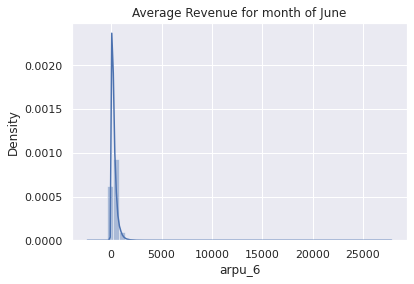

In [51]:
univariate_plot(data_train.arpu_6, 'Average Revenue for month of June')

#### Deriving New Features

In [52]:
telecom= data_train.copy()

In [53]:
#This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.
# Total mou at good phase incoming and outgoing
telecom['total_mou_good'] = (telecom['total_og_mou_6'] + telecom['total_og_mou_7'] +\
                                   telecom['total_ic_mou_6'] + telecom['total_ic_mou_7'])/2

In [54]:
telecom['avg_mou_action'] = (telecom['total_og_mou_8'] + telecom['total_ic_mou_8'])

In [55]:
# Difference avg_mou_good and avg_mou_action
telecom['diff_mou'] = telecom['avg_mou_action'] - telecom['total_mou_good']

In [56]:
# Checking whether the mou has decreased in action phase
telecom['decrease_mou_action'] = np.where((telecom['diff_mou'] < 0), 1, 0)

In [57]:
telecom.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,183.885,44.19,-139.695,1
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,36.805,56.70,19.895,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,156.985,36.64,-120.345,1
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0

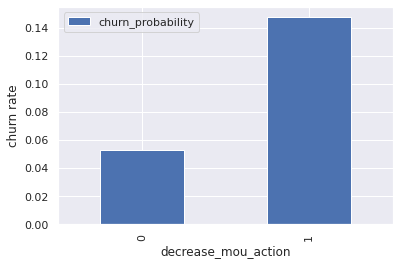

In [58]:
telecom.pivot_table(values='churn_probability', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

The churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

In [59]:
#This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.
# Avg rech number at good phase
telecom['avg_rech_num_good'] = (telecom['total_rech_num_6'] + telecom['total_rech_num_7'])/2

In [60]:
#Difference total_rech_num_8 and avg_rech_good
telecom['diff_rech_num'] =telecom['total_rech_num_8']- telecom['avg_rech_num_good']

In [61]:
# Checking if rech_num has decreased in action phase
telecom['decrease_rech_num_action'] = np.where((telecom['diff_rech_num'] < 0), 1, 0)

In [62]:
telecom.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,183.885,44.19,-139.695,1,2.5,-0.5,1
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,36.805,56.70,19.895,0,3.5,1.5,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,156.985,36.64,-120.345,1,3.0,-1.0,1
3,3,156.362

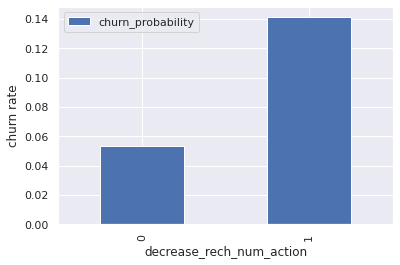

In [63]:
telecom.pivot_table(values='churn_probability', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

The churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

In [64]:
# This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.
# Avg rech_amt in good phase
telecom['avg_rech_amt_good'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2

In [65]:
# Difference of action phase rech amt and good phase rech amt
telecom['diff_rech_amt'] =  telecom['total_rech_amt_8']- telecom['avg_rech_amt_good'] 

In [66]:
# Checking if rech_amt has decreased in action phase
telecom['decrease_rech_amt_action'] = np.where((telecom['diff_rech_amt'] < 0), 1, 0) 

In [67]:
telecom.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,183.885,44.19,-139.695,1,2.5,-0.5,1,71.0,-61.0,1
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,36.805,56.70,19.895,0,3.5,1.5,0,72.5,-22.5,1
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,

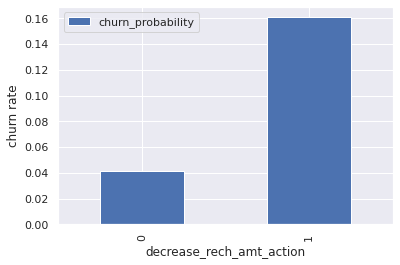

In [68]:
telecom.pivot_table(values='churn_probability', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

In [69]:
# This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.
# VBC in good phase
telecom['avg_vbc_3g_good'] = (telecom['jun_vbc_3g'] + telecom['jul_vbc_3g'])/2

In [70]:
# Difference of good and action phase VBC
telecom['diff_vbc'] = telecom['aug_vbc_3g'] - telecom['avg_vbc_3g_good']

In [71]:
# Checking whether the VBC has decreased on the action month
telecom['decrease_vbc_action'] = np.where(telecom['diff_vbc'] < 0 , 1, 0)

In [72]:
telecom.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,183.885,44.19,-139.695,1,2.5,-0.5,1,71.0,-61.0,1,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,36.805,56.70,19.895,0,3.5,1.5,0,72.5,-22.5,1,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,

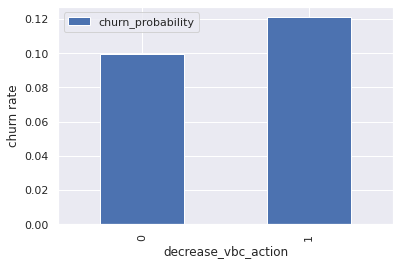

In [73]:
telecom.pivot_table(values='churn_probability', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [74]:
# This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.
# ARUP in good phase
telecom['avg_arpu_good'] = (telecom['arpu_6'] + telecom['arpu_7'])/2

In [75]:
# Difference of good and action phase ARPU
telecom['diff_arpu'] = telecom['arpu_8'] - telecom['avg_arpu_good'] 

In [76]:
# Checking whether the arpu has decreased on the action month
telecom['decrease_arpu_action'] = np.where(telecom['diff_arpu'] < 0, 1, 0)

In [77]:
telecom.head()


,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_good,diff_rech_num,decrease_rech_num_action,avg_rech_amt_good,diff_rech_amt,decrease_rech_amt_action,avg_vbc_3g_good,diff_vbc,decrease_vbc_action,avg_arpu_good,diff_arpu,decrease_arpu_action
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,183.885,44.19,-139.695,1,2.5,-0.5,1,71.0,-61.0,1,0.0,0.0,0,59.1430,-51.6160,1
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,36.805,56.70,19.895,0,3.5,1.5,0,72.5,-22.5,1,0.0,0.0,0,61.3935,-18.4405,1
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.8

In [78]:
# Creating churn dataframe
data_churn = telecom[telecom['churn_probability'] == 1]
# Creating not churn dataframe
data_non_churn = telecom[telecom['churn_probability'] == 0]

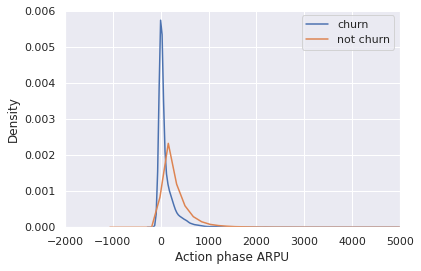

In [79]:
# Distribution plot
ax = sns.distplot(data_churn['arpu_8'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['arpu_8'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')
plt.xlim(-2000,5000)
plt.legend()
plt.show()


In [80]:
data_final = telecom.drop(['diff_arpu','avg_arpu_good','diff_vbc','avg_vbc_3g_good','diff_rech_amt',\
                          'avg_rech_amt_good','total_mou_good','avg_mou_action','diff_mou',\
                          'avg_rech_num_good','diff_rech_num','decrease_mou_action',\
                          'decrease_rech_num_action','decrease_rech_amt_action','decrease_vbc_action',\
                           'decrease_arpu_action'],axis=1)

In [81]:
data_final.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60

The higher ARPU customers are less likely to be churned.

In [82]:
# dropping few derived columns which are not required for the analysis
perc = [.10, .30, .50, .70, .90, .99]
desc = data_final.describe(percentiles = perc)
desc

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.050076,44.394344,43.269280,89.551272,87.313796,86.301054,3.595161,3.632045,3.467948,1.081499,1.308807,1.

## Splitting the data into train and test

In [83]:
# Import library
from sklearn.model_selection import train_test_split

In [84]:
# Putting feature variables into X
X = data_final.drop(['id','churn_probability'], axis=1)
y = data_final['churn_probability']

In [85]:
Test_data = data_test.drop(['id'], axis=1)
Test_data.shape

(30000, 133)

In [86]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [87]:
X_train.shape, X_test.shape

((55999, 133), (14000, 133))

### Dealing with data imbalance 

In [88]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [89]:
# Instantiate SMOTE
sm = SMOTE(random_state=42)

In [91]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [92]:
X_train.shape

(100518, 133)

### Scaling the data

In [93]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [94]:
# Instantiate the Scaler
scaler = StandardScaler()

In [95]:
X_train_scaled = X_train.copy()
Test_data_scaled = Test_data.copy()
#X_train_scaled.drop(['decrease_mou_action', 'decrease_rech_num_action',
 #      'decrease_rech_amt_action', 'decrease_vbc_action',
  #     'decrease_arpu_action'], axis=1, inplace=True)

cols_list_to_scale = X_train.columns.to_list()

In [96]:
X_train_scaled[cols_list_to_scale] = scaler.fit_transform(X_train_scaled[cols_list_to_scale])

In [97]:
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.768272,0.660259,-0.634524,-0.442626,-0.207014,-0.344921,-0.580665,-0.111164,-0.471241,-0.166381,-0.123472,-0.138560,-0.210517,-0.202770,-0.179417,-0.276831,0.201920,-0.228115,-0.509936,0.521981,-0.443244,-0.250962,-0.241602,-0.217838,-0.220848,-0.160409,-0.194345,-0.506302,0.441275,-0.426005,-0.343531,-0.308580,-0.258864,-0.365059,-0.331419,-0.279031,-0.119497,-0.109061,-0.104837,-0.468925,-0.421984,-0.351462,-0.036942,-0.029729,-0.026194,-0.274412,-0.227237,-0.245320,-0.115753,-0.01345,-0.010820,-0.645932,-0.181392,-0.501051,-0.303430,-0.249754,-0.256988,-0.549192,-0.093964,-0.476245,-0.272167,-0.246120,-0.229819,-0.565033,-0.245234,-0.485936,-0.198513,-0.176167,-0.158608,-0.249456,-0.248793,-0.225964,-0.117735,-0.114111,-0.097937,-0.302523,-0.288164,-0.258904,-0.618539,-0.337304,-0.522903,-0.369955,-0.232031,-0.202061,-0.123206,-0.120561,-0.108689,-0.074870,-0.073384,-0.059540,-1.048359,-0.876210,-0.540470,-0.793097,-0.730892,-0.598388,-0.838147,-0.751105,-0.662543,-0.630856,-0.545649,-0.471277,-0.348637,-0.328049,-0.294222,-0.378086,-0.357586,-0.326205,-0.362986,-0.348456,-0.311878,-0.237763,-0.221443,-0.189573,-0.209951,-0.203323,-0.189898,-0.208579,-0.206197,-0.200858,-0.245164,-0.237900,-0.216963,-0.185781,-0.176514,-0.170331,-0.114109,-0.108812,-0.098377,-0.305900,-0.202203,-0.216999,-0.213843
1,-0.371158,-0.208390,-0.389946,0.433719,0.189934,0.390798,0.272949,-0.069029,0.038100,-0.166381,0.057552,-0.138560,-0.210517,-0.190546,-0.179417,1.540071,0.938929,1.339287,1.385463,0.395062,0.705900,-0.250962,-0.241602,-0.217838,4.709832,0.995773,2.486659,1.797310,0.805916,1.239267,-0.192067,-0.212088,-0.225675,-0.364189,-0.221857,-0.279031,-0.119497,-0.109061,-0.104837,-0.369277,-0.286680,-0.329921,-0.036942,-0.029729,-0.026194,1.393173,0.232714,0.773170,-0.115753,-0.01345,-0.010820,0.504047,0.114637,0.332271,0.217111,0.153645,0.692111,6.110920,2.554179,1.649328,-0.183438,-0.063795,-0.229819,4.133768,1.675562,1.428104,-0.172442,-0.176167,-0.158608,-0.190449,0.417075,-0.163523,-0.117735,-0.114111,-0.097937,-0.244140,0.2057

In [98]:
# scaling the test data
# Transform the test set
X_test[cols_list_to_scale] = scaler.transform(X_test[cols_list_to_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
3425,-0.725918,0.990902,-0.650882,-0.359639,1.346890,-0.344921,-0.580486,2.066728,-0.465506,-0.154300,-0.121509,-0.138560,0.114874,0.182649,-0.179417,-0.276831,-0.060973,-0.228115,-0.509936,-0.132857,-0.443244,-0.250962,-0.241602,-0.217838,-0.220848,1.067708,-0.194345,-0.506302,-0.133528,-0.426005,-0.343531,1.538435,-0.258864,-0.365059,2.313813,-0.279031,-0.119497,-0.109061,-0.104837,-0.468925,2.532315,-0.351462,-0.036942,-0.029729,-0.026194,-0.274412,3.556954,-0.127014,-0.115753,-0.01345,-0.01082,-0.645932,2.272522,-0.497251,-0.303430,-0.113401,-0.256988,-0.549192,-0.260558,-0.465708,-0.272167,-0.246120,-0.229819,-0.565033,-0.266783,-0.478988,-0.198513,0.014120,-0.158608,-0.249456,-0.175860,-0.225964,-0.117735,-0.114111,-0.097937,-0.302523,-0.139356,-0.258904,-0.618539,-0.248600,-0.507519,-0.369955,-0.232031,-0.202061,-0.123206,0.147865,-0.063951,-0.074870,-0.073384,-0.066261,-0.359595,1.787663,-0.540470,-0.696674,0.943253,-0.598388,-0.668463,-0.299259,-0.662543,-0.630856,-0.434874,-0.471277,-0.348637,-0.328049,-0.294222,-0.378086,-0.357586,-0.326205,-0.362986,-0.348456,-0.311878,-0.237763,-0.221443,-0.189573,-0.209951,-0.203323,-0.189898,-0.208579,-0.206197,-0.200858,-0.245164,-0.237900,-0.216963,-0.185781,-0.176514,-0.170331,-0.114109,-0.108812,-0.098377,-0.228527,-0.202203,-0.216999,-0.213843
33067,1.399629,1.010655,0.155962,0.940879,0.540746,-0.245770,2.943946,0.738385,-0.113276,0.894501,0.966339,0.925194,1.059734,2.628840,1.531647,0.982326,0.443683,-0.228115,3.463488,-0.015188,-0.443244,-0.210111,-0.066671,-0.217838,-0.220848,0.785202,0.801799,2.813819,0.254957,-0.426005,0.491409,0.102609,-0.258864,1.564815,0.554037,-0.279031,-0.119497,-0.109061,-0.104837,1.358130,0.432871,-0.351462,-0.036942,-0.029729,-0.026194,-0.274412,-0.227237,-0.245320,-0.115753,-0.01345,-0.01082,2.423458,0.475315,-0.501051,1.069771,0.266990,-0.256988,1.761150,-0.258780,-0.476245,-0.272167,-0.246120,-0.229819,1.707531,-0.036212,-0.485936,-0.032169,-0.104947,-0.158608,0.195114,0.198423,-0.225964,-0.117735,-0.114111,-0.097937,0.123896,0.079028,-0.2

In [99]:
# Data from test.csv file to be scaled similar to scaling test data for evaluation
Test_data_scaled[cols_list_to_scale] = scaler.transform(Test_data_scaled[cols_list_to_scale])
Test_data_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.561192,-0.558515,-0.429815,-0.342080,-0.331098,-0.255519,-0.400686,-0.425979,-0.343207,-0.166381,-0.123472,-0.138560,-0.210517,-0.20277,-0.179417,-0.083723,-0.092948,-0.047578,-0.381103,-0.398370,-0.373871,-0.250962,1.042488,-0.217838,-0.220848,-0.160409,-0.188356,-0.308473,-0.256119,-0.273486,-0.319164,-0.308580,-0.249582,-0.218789,-0.303097,-0.159670,-0.119497,-0.109061,-0.104837,-0.355903,-0.403156,-0.267765,-0.036942,-0.029729,-0.026194,-0.274412,-0.227237,-0.243045,-0.115753,-0.01345,-0.01082,-0.459392,-0.471807,-0.359911,-0.058996,0.021482,-0.054962,-0.481712,-0.494728,-0.404517,-0.263869,-0.246120,-0.229819,-0.386667,-0.331388,-0.329559,-0.198513,-0.176167,-0.158608,-0.244767,-0.233408,-0.151515,-0.117735,-0.114111,-0.097937,-0.298809,-0.276751,-0.204373,-0.463008,-0.405653,-0.371156,3.386937,2.686407,3.289937,-0.123206,-0.120561,-0.108689,-0.07487,-0.073384,-0.066261,-0.359595,-0.284238,-0.222856,-0.544807,-0.496199,-0.440403,-0.413937,-0.500079,-0.411385,-0.308609,-0.213324,-0.471277,-0.348637,-0.328049,-0.294222,-0.378086,-0.357586,-0.326205,-0.362986,-0.348456,-0.311878,-0.237763,-0.221443,-0.189573,-0.209951,-0.203323,-0.189898,-0.208579,-0.206197,-0.200858,-0.245164,-0.2379,-0.216963,-0.185781,-0.176514,-0.170331,-0.114109,-0.108812,-0.098377,0.734079,-0.202203,-0.216999,-0.213843
1,0.367258,0.841542,0.511770,-0.203726,-0.260701,-0.268169,0.838406,1.428199,0.980543,-0.166381,-0.123472,-0.138560,-0.210517,-0.20277,-0.179417,0.309244,0.074341,-0.058036,2.855565,4.053569,2.687360,-0.181611,-0.241602,-0.217838,-0.220848,-0.160409,-0.194345,2.022828,2.607927,1.631991,-0.343531,-0.308580,-0.258864,-0.365059,-0.243799,-0.199186,-0.119497,-0.109061,-0.104837,-0.468925,-0.363734,-0.299504,-0.036942,-0.029729,0.006792,-0.274412,-0.227237,-0.245320,-0.115753,-0.01345,-0.01082,0.469697,0.821759,0.511315,-0.142328,-0.056507,-0.232998,0.509549,0.342508,0.914737,-0.224611,-0.246120,-0.229819,0.229070,0.143413,0.444235,-0.198513,-0.176167,-0.158608,-0.249456,-0.063723,-0.225964,-0.117735,-0.114111,-0.097937,-0.302523,-0.15

### Modelling with PCA

In [100]:
#Import PCA
from sklearn.decomposition import PCA

In [101]:
# Creating an instance of the class PCA
pca = PCA(svd_solver='randomized',random_state=42)

In [102]:
# Fitting training set on PCA
pca.fit(X_train_scaled)

PCA(random_state=42, svd_solver='randomized')

In [103]:
# Principal components
pca.components_

array([[ 1.49430823e-01,  1.87589892e-01,  1.78302912e-01, ...,
         7.02512532e-02,  6.95238165e-02,  5.97183636e-02],
       [-4.75152481e-02, -4.44165272e-02, -1.05922217e-02, ...,
         1.49707651e-01,  1.57665117e-01,  1.45609812e-01],
       [ 7.86303410e-02,  9.48149526e-02,  7.01533149e-02, ...,
         7.85857130e-02,  8.71291820e-02,  7.82292226e-02],
       ...,
       [-4.33701821e-07,  2.86727823e-07,  1.43904404e-07, ...,
         8.15854515e-08,  5.94788044e-08,  3.48174784e-08],
       [-2.19179922e-07, -9.09135780e-08, -1.34518022e-07, ...,
        -7.27266192e-08,  9.95541760e-08, -1.56138741e-08],
       [-2.80068316e-07,  3.97800287e-08,  3.81921307e-08, ...,
         1.71321577e-08,  2.50057804e-08, -3.39551348e-08]])

In [104]:
# Cumulative variance of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.12660135 0.20327343 0.26645247 0.30631231 0.34544034 0.37713467
 0.40708376 0.43393806 0.45896995 0.48234448 0.50447716 0.52499953
 0.54496608 0.56448683 0.5827264  0.59804991 0.61309168 0.6272717
 0.64124273 0.65433303 0.66713334 0.6791344  0.69101866 0.70276872
 0.7144007  0.72511169 0.73522698 0.74439375 0.75340287 0.76217681
 0.77065819 0.77886718 0.78677271 0.79423959 0.8016884  0.80887626
 0.81589318 0.82263725 0.82926748 0.83572838 0.84203979 0.84805195
 0.85394733 0.85951826 0.8649956  0.87005459 0.87463099 0.87905214
 0.88324463 0.8873339  0.89138067 0.89535321 0.89923838 0.90296312
 0.90664012 0.91026807 0.91383495 0.9173523  0.92063856 0.9238284
 0.92688598 0.92993907 0.93293949 0.93583272 0.93866316 0.94138216
 0.94403839 0.94664961 0.94920763 0.95171282 0.95409608 0.95644677
 0.95878403 0.96104047 0.96325313 0.96537586 0.96746112 0.96951135
 0.97145489 0.97332472 0.97515294 0.9769748  0.97872323 0.98044983
 0.98211256 0.98376415 0.98537788 0.9867507  0.98807627 0.989334

Text(0, 0.5, 'Cumulative Variance')

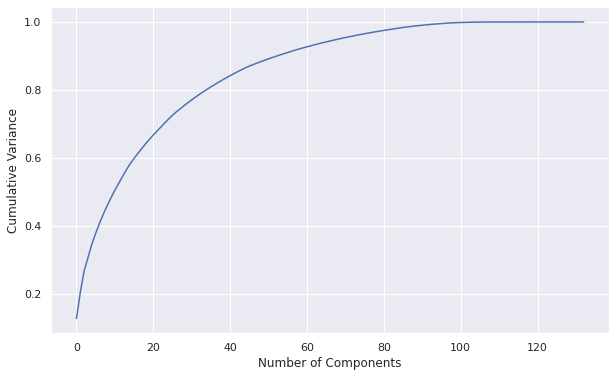

In [105]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [106]:
#We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

In [107]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [108]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [109]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train_scaled)
# Transform test data X_test
X_test_pca = pca_final.transform(X_test)

In [110]:
# Transforming test data for the main csv file that has to be submitted for the evaluation
Test_data_pca = pca_final.transform(Test_data_scaled)

### Model 1:  Logistic Regression with PCA

In [111]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Impoting metrics for evaluation
from sklearn import metrics

In [112]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [113]:
# C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
model = LogisticRegression()
# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
lr_model = GridSearchCV(estimator = model,
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
lr_model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [114]:
# results of grid search CV
cv_results = pd.DataFrame(lr_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.876292,0.034916,0.004664,0.000070,0.01,{'C': 0.01},0.830631,0.828293,0.827497,0.835547,0.831269,0.830647,0.002823,6,0.831186,0.831385,0.831149,0.830467,0.830915,0.831020,0.000314
1,0.995930,0.037643,0.005159,0.001129,0.1,{'C': 0.1},0.830481,0.828492,0.827746,0.835646,0.831617,0.830797,0.002790,4,0.831621,0.831696,0.831547,0.830678,0.831437,0.831396,0.000369
2,1.040592,0.039323,0.004672,0.000085,1,{'C': 1},0.830332,0.828542,0.827845,0.835895,0.831468,0.830816,0.002844,1,0.831671,0.831771,0.831584,0.830741,0.831549,0.831463,0.000369
3,1.011857,0.027390,0.004593,0.000075,10,{'C': 10},0.830332,0.828392,0.827845,0.835895,0.831468,0.830787,0.002869,5,0.831621,0.831771,0.831572,0.830741,0.831561,0.831453,0.000364
4,1.020447,0.033034,0.004646,0.000075,100,{'C': 100},0.830332,0.828492,0.827845,0.835895,0.831468,0.830806,0.002852,2,0.831634,0.831771,0.831572,0.830741,0.831561,0.831456,0.000365


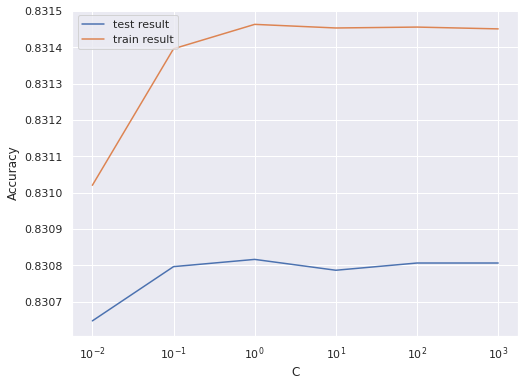

In [115]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [116]:
# Best score with best C
best_score = lr_model.best_score_
best_C = lr_model.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8308164282041398 at C = 1


In [117]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [118]:
# Fit the model on the train set
lr_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [119]:
# Predictions on the train set
y_train_pred = lr_pca_model.predict(X_train_pca)

In [120]:
y_train_proba = lr_pca_model.predict_proba(X_train_pca)

In [121]:
# Confusion matrix
cm = metrics.confusion_matrix(y_train, y_train_pred)
print(cm)

[[39518 10741]
 [ 6211 44048]]


In [122]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [123]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8313535884120257
Sensitivity:- 0.8764201436558626
Specificity:- 0.7862870331681888


In [124]:
# Final Prediction on the test set
y_test_pred = lr_pca_model.predict_proba(X_test_pca)[::,1]

In [125]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, lr_pca_model.predict(X_test_pca))
print(cm)

[[10014  2594]
 [  213  1179]]


In [126]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [127]:
# Accuracy
Accuracy = metrics.accuracy_score(y_test,lr_pca_model.predict(X_test_pca))
print("Accuracy:-", Accuracy)

# Sensitivity
Sensitivity = TP / float(TP+FN)
print("Sensitivity:-",Sensitivity)

# Specificity
Specificity = TN / float(TN+FP)
print("Specificity:-", Specificity)

Accuracy:- 0.7995
Sensitivity:- 0.8469827586206896
Specificity:- 0.794257614213198


In [128]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred)

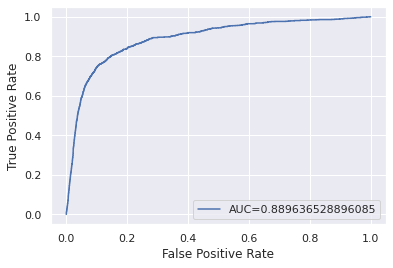

In [129]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [130]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values})
y_train_pred_final['id'] = y_train.index
y_train_pred_final.shape

(100518, 2)

In [131]:
y_train_proba= y_train_proba[:,1]

In [132]:
y_train_proba.shape

(100518,)

In [133]:
y_train_pred_final['Churn_Prob'] = y_train_proba

In [134]:
y_train_pred_final.head()

,Churn,id,Churn_Prob
0,1,0,0.879468
1,0,1,0.025877
2,0,2,0.012850
3,0,3,0.005100
4,0,4,0.011700


In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,id,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0.879468,1,1,1,1,1,1,1,1,1,0
1,0,1,0.025877,1,0,0,0,0,0,0,0,0,0
2,0,2,0.012850,1,0,0,0,0,0,0,0,0,0
3,0,3,0.005100,1,0,0,0,0,0,0,0,0,0
4,0,4,0.011700,1,0,0,0,0,0,0,0,0,0


In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=np.sum(cm1)
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.698343  0.972582  0.424103
0.2   0.2  0.749468  0.952785  0.546151
0.3   0.3  0.784118  0.930978  0.637259
0.4   0.4  0.810790  0.907638  0.713942
0.5   0.5  0.831354  0.876420  0.786287
0.6   0.6  0.840337  0.830040  0.850634
0.7   0.7  0.830120  0.750691  0.909549
0.8   0.8  0.771852  0.587716  0.955988
0.9   0.9  0.559741  0.129052  0.990430


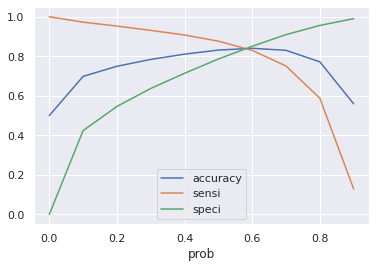

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [138]:
print(metrics.classification_report(y_test, lr_pca_model.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88     12608
           1       0.31      0.85      0.46      1392

    accuracy                           0.80     14000
   macro avg       0.65      0.82      0.67     14000
weighted avg       0.91      0.80      0.84     14000



In [139]:
results = pd.DataFrame()

In [140]:
results['Score'] = ['Accuracy', 'Sensitivity/Recall', 'Specificity','AUC']

In [141]:
results['Logistic Regression'] = [Accuracy, Sensitivity,Specificity, auc ]

In [142]:
results.head()

,Score,Logistic Regression
0,Accuracy,0.799500
1,Sensitivity/Recall,0.846983
2,Specificity,0.794258
3,AUC,0.889637


### Model 2: Decision Tree with PCA

In [143]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [144]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150,50 ),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

dt_model = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'accuracy',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
dt_model.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy', verbose=1)

In [145]:
# cv results
cv_results = pd.DataFrame(dt_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.319612,0.016817,0.005982,0.000431,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.797652,0.801234,0.807302,0.816147,0.809033,0.806274,0.006417,5
1,3.359199,0.034087,0.005745,0.000097,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.797652,0.801234,0.807302,0.816147,0.809033,0.806274,0.006417,5
2,3.578465,0.405036,0.005980,0.000200,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.797652,0.801234,0.807302,0.816147,0.809033,0.806274,0.006417,5
3,3.337734,0.023434,0.005821,0.000071,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.797652,0.801234,0.807302,0.816147,0.809033,0.806274,0.006417,5
4,5.764833,0.015226,0.007013,0.000911,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.833267,0.838440,0.850577,0.846043,0.846491,0.842964,0.006235,1


In [146]:
# Printing the optimal sensitivity score and hyperparameters
print("Best accuracy:-",dt_model.best_score_)
print(dt_model.best_estimator_)

Best accuracy:- 0.8429635150562348
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [147]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [148]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [149]:
# Confusion matrix
cm = metrics.confusion_matrix(y_train, y_train_pred)
print(cm)

[[44208  6051]
 [ 8075 42184]]


In [150]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [151]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8594679559879822
Sensitivity:- 0.8393322588989037
Specificity:- 0.8796036530770608


In [152]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [153]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
print(cm)

[[10900  1708]
 [  362  1030]]


In [154]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [155]:
# Accuracy
Accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy:-", Accuracy)

# Sensitivity
Sensitivity = TP / float(TP+FN)
print("Sensitivity:-",Sensitivity)

# Specificity
Specificity = TN / float(TN+FP)
print("Specificity:-", Specificity)

Accuracy:- 0.8521428571428571
Sensitivity:- 0.7399425287356322
Specificity:- 0.8645304568527918


In [156]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred)

In [157]:
results['Decision Tree'] = [Accuracy, Sensitivity,Specificity, auc]

In [158]:
results

,Score,Logistic Regression,Decision Tree
0,Accuracy,0.799500,0.852143
1,Sensitivity/Recall,0.846983,0.739943
2,Specificity,0.794258,0.864530
3,AUC,0.889637,0.802236


In [254]:
import pickle
pickle.dump(dt_pca_model, open('dt_pca_model', 'wb'))

### Model 3: Random Forest with PCA

In [159]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [163]:
# model with the best hyperparameters

rf_pca_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=300)

In [164]:
# Fit the model
rf_pca_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=300)

In [165]:
# Predictions on the train set
y_train_pred = rf_pca_model.predict(X_train_pca)

In [166]:
# Confusion matrix
cm = metrics.confusion_matrix(y_train, y_train_pred)
print(cm)

[[42589  7670]
 [ 8772 41487]]


In [167]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [168]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8364273065520603
Sensitivity:- 0.825464095982809
Specificity:- 0.8473905171213116


In [169]:
# Prediction on the test set
y_test_pred = rf_pca_model.predict(X_test_pca)

In [170]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
print(cm)

[[10729  1879]
 [  297  1095]]


In [171]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [172]:
# Accuracy
Accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy:-", Accuracy)

# Sensitivity
Sensitivity = TP / float(TP+FN)
print("Sensitivity:-",Sensitivity)

# Specificity
Specificity = TN / float(TN+FP)
print("Specificity:-", Specificity)

Accuracy:- 0.8445714285714285
Sensitivity:- 0.7866379310344828
Specificity:- 0.8509676395939086


In [173]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred)

In [174]:
results['Random Forest'] = [Accuracy, Sensitivity,Specificity, auc]

In [175]:
results

,Score,Logistic Regression,Decision Tree,Random Forest
0,Accuracy,0.799500,0.852143,0.844571
1,Sensitivity/Recall,0.846983,0.739943,0.786638
2,Specificity,0.794258,0.864530,0.850968
3,AUC,0.889637,0.802236,0.818803


In [253]:
import pickle
pickle.dump(rf_pca_model, open('rf_pca_model.pkl', 'wb'))

### Model 4 : Gradient Boosting with PCA

In [176]:
from sklearn.ensemble import GradientBoostingClassifier 

In [177]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(50,150,50),
               'min_samples_leaf': range(50, 150, 50),
               'min_samples_split': range(50, 150, 50),
               'max_depth': range(5,10,5)
              }
model = GradientBoostingClassifier(learning_rate=0.1,max_features='sqrt',subsample=0.8,random_state=42)
gb_model = GridSearchCV(estimator = model, 
                        param_grid = param_test1, 
                        scoring='accuracy',
                        n_jobs=4,cv=3)
gb_model.fit(X_train_pca, y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  random_state=42,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(5, 10, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': range(50, 150, 50)},
             scoring='accuracy')

In [195]:
# cv results
cv_results = pd.DataFrame(gb_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,36.896001,0.109436,0.163894,0.007271,5,50,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.850534,0.861398,0.863278,0.858403,0.005617,5
1,75.209004,0.039173,0.259435,0.027637,5,50,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.860174,0.873664,0.875992,0.869944,0.006973,1
2,37.148744,0.839876,0.159708,0.008486,5,50,100,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.850534,0.861398,0.863278,0.858403,0.005617,5
3,74.264693,0.243122,0.266138,0.003920,5,50,100,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.860174,0.873664,0.875992,0.869944,0.006973,1
4,37.373090,0.504708,0.198713,0.064394,5,100,50,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.848773,0.860353,0.862622,0.857249,0.006065,7


In [179]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy score of',gb_model.best_score_,'using',gb_model.best_params_, 'parameters.')

Accuracy score of 0.8699436916771125 using {'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100} parameters.


In [180]:
gb_pca_model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=50,n_estimators=100,
                                   min_samples_leaf=50,max_depth=5,max_features='sqrt',random_state=10)

In [181]:
# Fit the model
gb_pca_model.fit(X_train_pca, y_train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=50,
                           random_state=10)

In [182]:
# Predictions on the train set
y_train_pred = gb_pca_model.predict(X_train_pca)

In [183]:
# Confusion matrix
cm = metrics.confusion_matrix(y_train, y_train_pred)
print(cm)

[[44213  6046]
 [ 5957 44302]]


In [184]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [185]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.880588551304244
Sensitivity:- 0.8814739648620148
Specificity:- 0.8797031377464732


In [186]:
# Prediction on the test set
y_test_pred = gb_pca_model.predict(X_test_pca)

In [187]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
print(cm)

[[11037  1571]
 [  278  1114]]


In [188]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [189]:
# Accuracy
Accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy:-", Accuracy)

# Sensitivity
Sensitivity = TP / float(TP+FN)
print("Sensitivity:-",Sensitivity)

# Specificity
Specificity = TN / float(TN+FP)
print("Specificity:-", Specificity)

Accuracy:- 0.8679285714285714
Sensitivity:- 0.8002873563218391
Specificity:- 0.8753965736040609


In [190]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred)

In [191]:
results['Gradient Boosting'] = [Accuracy, Sensitivity,Specificity, auc]

In [192]:
results

,Score,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting
0,Accuracy,0.799500,0.852143,0.844571,0.867929
1,Sensitivity/Recall,0.846983,0.739943,0.786638,0.800287
2,Specificity,0.794258,0.864530,0.850968,0.875397
3,AUC,0.889637,0.802236,0.818803,0.837842


In [252]:
# saving the model
import pickle
pickle.dump(gb_pca_model, open('gb_pca_model.pkl', 'wb'))

### Model 5: XGBoost with PCA

In [196]:
import xgboost as xgb
from xgboost import XGBClassifier

In [265]:
xgb_pca_model =XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=10, random_state=42)

In [266]:
# Fit the model
xgb_pca_model.fit(X_train_pca, y_train)

XGBClassifier(max_depth=10, random_state=42)

In [267]:
# Predictions on the train set
y_train_pred = xgb_pca_model.predict(X_train_pca)

In [268]:
# Confusion matrix
cm = metrics.confusion_matrix(y_train, y_train_pred)
print(cm)

[[49420   839]
 [  192 50067]]


In [269]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [270]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9897431305835771
Sensitivity:- 0.9961797886945621
Specificity:- 0.983306472472592


In [271]:
# Prediction on the test set
y_test_pred = xgb_pca_model.predict(X_test_pca)

In [272]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
print(cm)

[[11678   930]
 [  400   992]]


In [273]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [274]:
# Accuracy
Accuracy = metrics.accuracy_score(y_test,y_test_pred)
print("Accuracy:-", Accuracy)

# Sensitivity
Sensitivity = TP / float(TP+FN)
print("Sensitivity:-",Sensitivity)

# Specificity
Specificity = TN / float(TN+FP)
print("Specificity:-", Specificity)

Accuracy:- 0.905
Sensitivity:- 0.7126436781609196
Specificity:- 0.9262373096446701


In [275]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred)

In [276]:
results['XGBoost'] = [Accuracy, Sensitivity,Specificity, auc]

In [277]:
results

,Score,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,XGBoost
0,Accuracy,0.799500,0.852143,0.844571,0.867929,0.905000
1,Sensitivity/Recall,0.846983,0.739943,0.786638,0.800287,0.712644
2,Specificity,0.794258,0.864530,0.850968,0.875397,0.926237
3,AUC,0.889637,0.802236,0.818803,0.837842,0.819440
